# Import Libraries

In [4]:
from pathlib import Path
import csv
import pandas as pd

# Read CSV 

In [5]:
fedpath = Path("fed_covid.csv")

In [6]:
fed_csv = pd.read_csv(fedpath)

# Set date as index
fed_csv = fed_csv.set_index(fed_csv['date'])
fed_csv = fed_csv.drop(columns = ['date'])
fed_csv.sample(2)

,headline,release,url,text
date,,,,
17-Mar-20,Federal Reserve Board announces establishment ...,Press Release,https://www.federalreserve.gov/newsevents/pres...,The Federal Reserve Board announced today that...
22-Mar-20,Agencies provide additional information to enc...,Joint Press Release,https://www.federalreserve.gov/newsevents/pres...,The federal financial institution regulatory a...


# LEMMANTIZE FED_FOMC

#### Import Libraries 

In [7]:
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.corpus import reuters, stopwords
import re

from collections import Counter

from nltk.corpus import reuters, stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Code to download corpora
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mindy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mindy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mindy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [9]:
fed_FOMC = fed_csv.loc[fed_csv['headline'] == 'Federal Reserve issues FOMC statement']

In [10]:
jan_29_FOMC = fed_FOMC.iloc[-1]['text']
mar_3_FOMC = fed_FOMC.iloc[-2]['text']
mar_15_FOMC = fed_FOMC.iloc[-3]['text']
mar_23_FOMC = fed_FOMC.iloc[-4]['text']
apr_29_FOMC = fed_FOMC.iloc[-5]['text']
jun_10_FOMC = fed_FOMC.iloc[-6]['text']

In [11]:
# Define function
def process_text(x):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', x)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

### JAN 29 LEMMANTIZE

In [12]:
x = jan_29_FOMC

LEM_jan_29 = process_text(x)
print(LEM_jan_29)

['information', 'received', 'since', 'federal', 'open', 'market', 'committee', 'met', 'december', 'indicates', 'labor', 'market', 'remains', 'strong', 'economic', 'activity', 'ha', 'rising', 'moderate', 'rate', 'job', 'gain', 'solid', 'average', 'recent', 'month', 'unemployment', 'rate', 'ha', 'remained', 'low', 'although', 'household', 'spending', 'ha', 'rising', 'moderate', 'pace', 'business', 'fixed', 'investment', 'export', 'remain', 'weak', 'month', 'basis', 'overall', 'inflation', 'inflation', 'item', 'food', 'energy', 'running', 'percent', 'marketbased', 'measure', 'inflation', 'compensation', 'remain', 'low', 'surveybased', 'measure', 'longerterm', 'inflation', 'expectation', 'little', 'changed', 'consistent', 'statutory', 'mandate', 'committee', 'seek', 'foster', 'maximum', 'employment', 'price', 'stability', 'committee', 'decided', 'maintain', 'target', 'range', 'federal', 'fund', 'rate', 'percent', 'committee', 'judge', 'current', 'stance', 'monetary', 'policy', 'appropriate

In [13]:
wc_jan_29 = Counter(LEM_jan_29)
print(dict(wc_jan_29.most_common(20)))

{'inflation': 9, 'committee': 6, 'rate': 5, 'federal': 4, 'market': 4, 'economic': 4, 'percent': 4, 'range': 4, 'information': 3, 'labor': 3, 'ha': 3, 'measure': 3, 'target': 3, 'fund': 3, 'condition': 3, 'objective': 3, 'strong': 2, 'activity': 2, 'rising': 2, 'moderate': 2}


In [14]:
bigram_jan_29 = Counter(ngrams(LEM_jan_29, n=2))
print(dict(bigram_jan_29.most_common(10)))

{('labor', 'market'): 3, ('target', 'range'): 3, ('range', 'federal'): 3, ('federal', 'fund'): 3, ('fund', 'rate'): 3, ('economic', 'activity'): 2, ('ha', 'rising'): 2, ('rising', 'moderate'): 2, ('inflation', 'expectation'): 2, ('maximum', 'employment'): 2}


# VADER SENTIMENT

In [15]:
# Initial imports
import os
from pathlib import Path
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

get_ipython().run_line_magic("matplotlib", "inline")

In [16]:
# Download/Update the VADER Lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mindy\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [17]:
fed_csv_num = fed_csv.reset_index()
fed_csv_num.head(2)

,date,headline,release,url,text
0,1-Jul-20,Agencies provide largest firms with informatio...,Joint Press Release,https://www.federalreserve.gov/newsevents/pres...,The Federal Deposit Insurance Corporation and ...
1,29-Jun-20,Federal Reserve Board releases new term sheet ...,Press Release,https://www.federalreserve.gov/newsevents/pres...,The Federal Reserve Board on Monday released a...


In [18]:
# Calculate sentiment based on compound score
def get_sentiment(score):
    # Neutral by default
    result = 0 
    # Positive 
    if score >= 0.99:
        result = 1 
    # Negative
    elif score <= -0.05:
        result = -1   
    return result

In [19]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

In [20]:
# Get sentiment for the text and the title
for index, row in fed_csv_num.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["headline"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
fed_csv_num = fed_csv_num.join(title_sentiment_df).join(text_sentiment_df)

fed_csv_num.head()


,date,headline,release,url,text,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,1-Jul-20,Agencies provide largest firms with informatio...,Joint Press Release,https://www.federalreserve.gov/newsevents/pres...,The Federal Deposit Insurance Corporation and ...,0.0000,0.000,1.000,0.000,0,-0.9186,0.020,0.897,0.083,-1
1,29-Jun-20,Federal Reserve Board releases new term sheet ...,Press Release,https://www.federalreserve.gov/newsevents/pres...,The Federal Reserve Board on Monday released a...,0.3818,0.126,0.874,0.000,0,0.9733,0.217,0.762,0.020,0
2,25-Jun-20,Federal Reserve Board releases results of stre...,Press Release,https://www.federalreserve.gov/newsevents/pres...,The Federal Reserve Board on Thursday released...,-0.4215,0.000,0.877,0.123,-1,-0.9398,0.057,0.852,0.092,-1
3,15-Jun-20,Federal Reserve Board announces it will be see...,Press Release,https://www.federalreserve.gov/newsevents/pres...,The Federal Reserve Board on Monday announced ...,0.5994,0.164,0.836,0.000,0,0.9887,0.120,0.856,0.024,0
4,15-Jun-20,Federal Reserve Board announces updates to Sec...,Press Release,https://www.federalreserve.gov/newsevents/pres...,The Federal Reserve Board on Monday announced ...,0.7845,0.198,0.802,0.000,0,0.9720,0.160,0.840,0.000,0


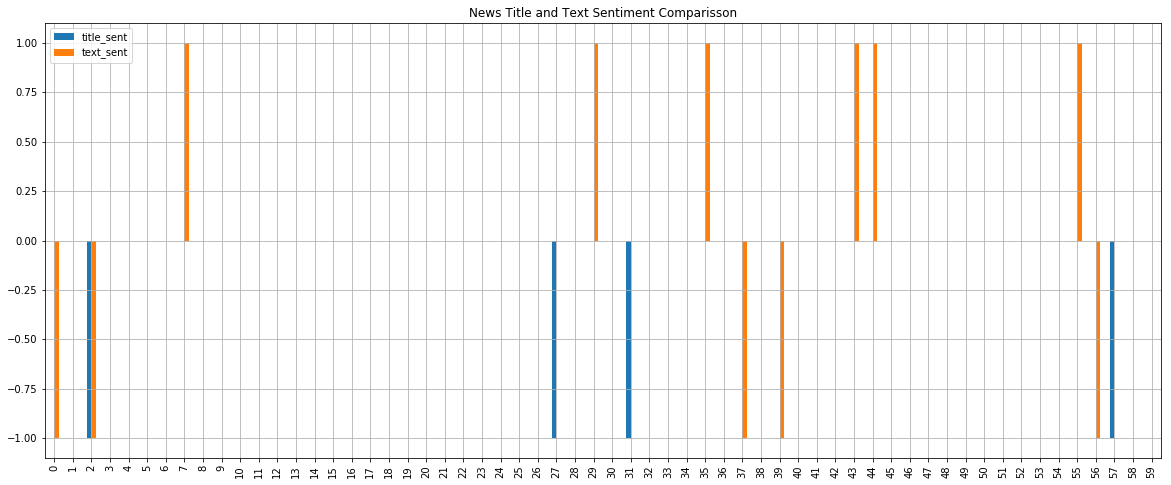

In [21]:
fed_csv_num.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="News Title and Text Sentiment Comparisson",
    figsize=(20, 8),
    grid=True,
)

In [22]:
fed_csv_num.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000,60.00000,60.000000,60.000000
mean,0.273065,0.125600,0.849600,0.024800,-0.066667,0.734025,0.11990,0.84575,0.034300,0.016667
std,0.331667,0.122015,0.131767,0.057485,0.251549,0.469465,0.04793,0.05197,0.026028,0.431461
min,-0.421500,0.000000,0.565000,0.000000,-1.000000,-0.939800,0.02000,0.69400,0.000000,-1.000000
25%,0.000000,0.000000,0.747500,0.000000,0.000000,0.711500,0.08875,0.81550,0.016750,0.000000
50%,0.202300,0.122000,0.865000,0.000000,0.000000,0.955750,0.11650,0.84600,0.027500,0.000000
75%,0.602650,0.214250,1.000000,0.000000,0.000000,0.983625,0.15625,0.87400,0.049000,0.000000
max,0.844200,0.391000,1.000000,0.249000,0.000000,0.999300,0.23400,0.97000,0.102000,1.000000
